In [1]:
#importing Packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read data
df = pd.read_csv("USA_Housing.csv")

In [3]:
#Checking data
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Checking data types
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [5]:
#Changing column names
df.columns = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price' , 'Address']

In [6]:
df.head()

,Income,Age,No_rooms,No_bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


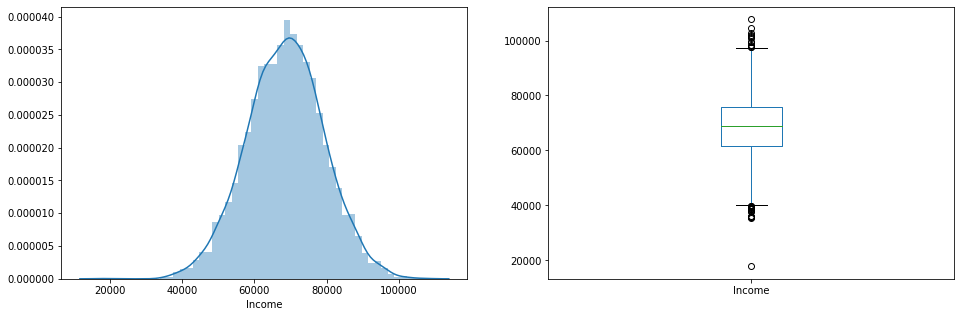

In [7]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Income']);

plt.subplot(122)
df['Income'].plot.box(figsize=(16,5))

plt.show()

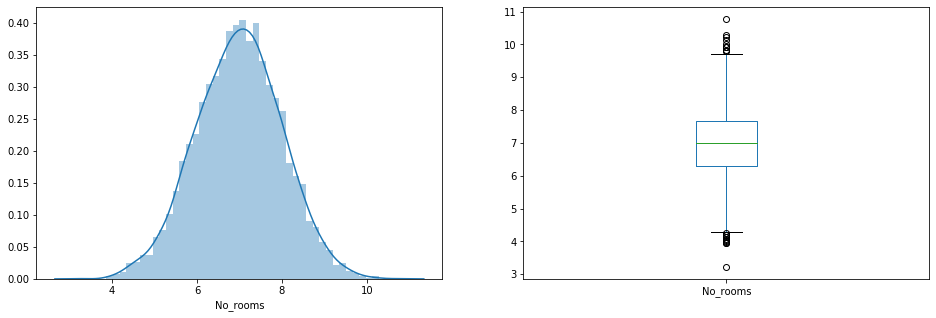

In [8]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(df['No_rooms']);

plt.subplot(122)
df['No_rooms'].plot.box(figsize=(16,5))

plt.show()

In [9]:
#Checking missing values.
df.isnull().sum()

Income         0
Age            0
No_rooms       0
No_bedrooms    0
Population     0
Price          0
Address        0
dtype: int64

In [10]:
names = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price']

In [11]:
#feature scaling
for i in names:
    df[i] = (df[i] - min(df[i])) / (max(df[i]) - min(df[i]))

In [12]:
df.head()

,Income,Age,No_rooms,No_bedrooms,Population,Price,Address
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384,USS Barnett\nFPO AP 44820
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702,USNS Raymond\nFPO AE 09386


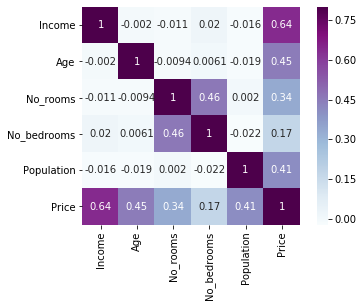

In [13]:
#Checking Correlation between features, response and dependent variables
matrix = df.corr()
sns.heatmap(matrix, vmax=.8, annot=True, square=True, cmap="BuPu");

In [14]:
#dropping target column
target = df['Price']
X = df.drop(['Price', 'Address'], axis = 1)

In [15]:
X.head()

,Income,Age,No_rooms,No_bedrooms,Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988


In [16]:
#Importing packages for train test data split
from sklearn.model_selection import train_test_split

In [17]:
#Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)

In [18]:
#Importing packages for linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [19]:
#Predicting values for test set
Y_predict = reg.predict(X_test)

In [20]:
#Calculating residuals
residual = abs(y_test-Y_predict)

In [21]:
#Checking residual info
residual.describe()

count    1000.000000
mean        0.032970
std         0.024292
min         0.000080
25%         0.013514
50%         0.028156
75%         0.046839
max         0.141394
Name: Price, dtype: float64

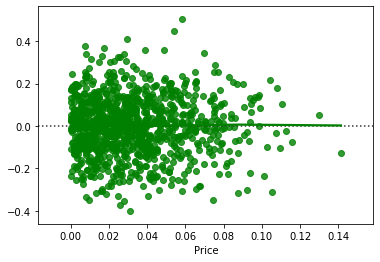

In [22]:
#Residual plot
sns.residplot(residual, Y_predict, lowess=True, color="g")

In [23]:
#Checking accuracy
reg.score(X_train, y_train)

0.9179787435623722

From this Model, we get an accuracy of 91.79

In [24]:
#Importing packages for QQ plot
import statsmodels.api as sm
import pylab
import scipy.stats as stats


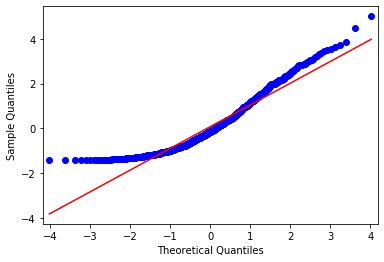

In [25]:
#Plotting QQ plot
sm.qqplot(residual, stats.t, line='r', fit=True )
pylab.show()